In [1]:
import pandas as pd

In [2]:
from prac_code.value import Value
from prac_code.plotter import Plotter

## Упражнение 1

In [4]:
tab1 = pd.read_csv("tables/1.csv", sep='\t')

In [5]:
tab1

,I,U
0,0.0,0.0
1,0.5,12.8
2,1.0,25.3
3,1.5,37.7
4,2.0,50.5


In [7]:
tab1.I = tab1.I.apply(Value) + Value(values=[0.0], syst=0.05)
tab1.U = tab1.U.apply(Value) + Value(values=[0.0], syst=0.05)

In [6]:
l1 = Value(values=[13.6], syst=0.2) * 10**-2
l2 = Value(values=[6.5], syst=0.2) * 10**-2

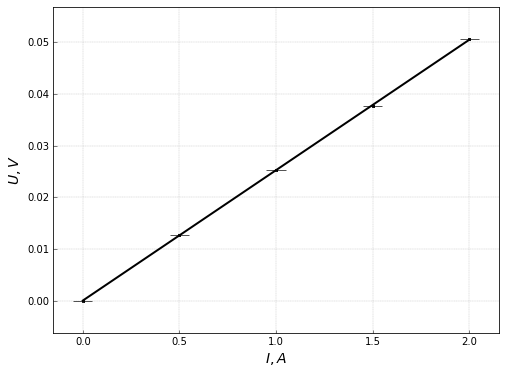

In [8]:
fit, *_ = Plotter(draw_legend=False).set_name("304_1").set_title("").set_y_name("$U, V$").set_x_name(
        "$I, A$"). \
        add_line(Plotter.get_new_line(y_value=tab1.U / 1000, x_value=tab1.I,
                                      draw_error=True, legend='$P_1$', fit=True, color='black', marker="s")).\
        plot(show=True, save=True)

In [10]:
from math import pi

In [13]:
kui = Value(values=[fit.a], syst=fit.sigma_a)
mu0 = 4 * pi * 10**-7
n = 237 / (l1 + l2)
kbi = mu0 * n
k = kbi / kui
print("k = {}".format(k))

k = 0.0588 ± 0.0009


## Упражнение 2

In [21]:
tab2 = pd.read_csv('tables/2.csv', sep='\t')

In [22]:
tab2

,z,U
0,0,51.0
1,1,51.2
2,2,51.4
3,3,51.6
4,4,51.6
5,5,51.6
6,6,51.4
7,7,51.1
8,8,50.1
9,9,46.8


In [23]:
tab2.z = (tab2.z.apply(Value) + Value(values=[0.0], syst=0.2)) / 100.0
tab2["B"] = tab2.U * k / 1000.0

тут z отсчитывается от середины

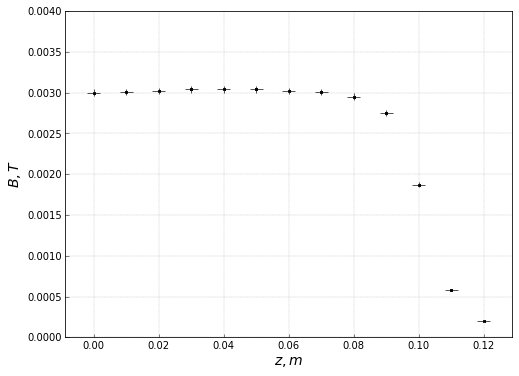

In [27]:
fit = Plotter(draw_legend=False).set_name("304_2").set_title("").set_y_name("$B, T$").set_x_name(
        "$z, m$"). \
        add_line(Plotter.get_new_line(y_value=tab2.B, x_value=tab2.z,
                                      draw_error=True, legend='$P_1$', fit=False, color='black', marker="s")).\
        plot(show=True, save=True, ylim=(0.0, 0.004))

In [36]:
tab3 = pd.read_csv("tables/3.csv", sep='\t')

In [37]:
tab3

,z,U
0,-4,1.0
1,-3,1.3
2,-2,2.1
3,-1,4.6
4,0,15.3
5,1,39.1
6,2,48.0
7,3,49.7
8,4,49.9
9,5,49.0


тут z отсчитывается как раз от торца

In [38]:
tab3.z = (tab3.z.apply(Value) + Value(values=[0.0], syst=0.2)) / 100.0
tab3["B"] = tab3.U * k / 1000.0

In [39]:
I = 2.0
D = 0.0194
l = l2
z = tab3.z
tab3["B_t"] = (-(z - l) / ((z - l)**2 + (D / 2)**2)**0.5 + z / (z**2 + (D / 2)**2)**0.5) * 0.5 * mu0 * n * I

In [40]:
tab3

,z,U,B,B_t
0,-0.040 ± 0.002,1.0,0.0000588 ± 9e-7,0.000035 ± 0.000004
1,-0.030 ± 0.002,1.3,0.0000765 ± 0.0000011,0.000064 ± 0.000009
2,-0.020 ± 0.002,2.1,0.0001236 ± 0.0000018,0.00014 ± 0.00002
3,-0.010 ± 0.002,4.6,0.000271 ± 0.000004,0.00041 ± 0.00010
4,0.000 ± 0.002,15.3,0.000900 ± 0.000013,0.0015 ± 0.0003
5,0.010 ± 0.002,39.1,0.00230 ± 0.00003,0.00252 ± 0.00011
6,0.020 ± 0.002,48.0,0.00282 ± 0.00004,0.00278 ± 0.00004
7,0.030 ± 0.002,49.7,0.00292 ± 0.00004,0.00284 ± 0.00004
8,0.040 ± 0.002,49.9,0.00294 ± 0.00004,0.00282 ± 0.00003
9,0.050 ± 0.002,49.0,0.00288 ± 0.00004,0.00270 ± 0.00006


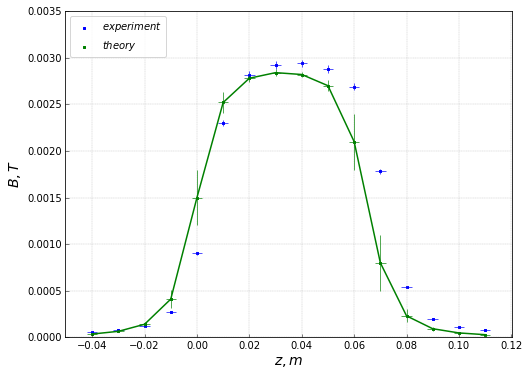

In [50]:
import matplotlib.pyplot as plt
fit = Plotter(draw_legend=True).set_name("304_3").set_title("").set_y_name("$B, T$").set_x_name(
        "$z, m$"). \
        add_line(Plotter.get_new_line(y_value=tab3.B, x_value=tab3.z,
                                      draw_error=True, legend='$experiment$', fit=False, color='blue', marker="s")).\
        add_line(Plotter.get_new_line(y_value=tab3.B_t, x_value=tab3.z,
                                      draw_error=True, legend='$theory$', fit=False, color='green', marker="s")).\
        plot(show=False, save=False, ylim=(0.0, 0.0035))

b_val = [b.get_value_error()[0] for b in tab3.B_t]
z_val = [z.get_value_error()[0] for z in tab3.z]
plt.plot(z_val, b_val, color='green')
plt.savefig("images/304_3.png", format='png', dpi=300)
plt.show()

## Упражнение 3

In [66]:
tab4 = pd.read_csv("tables/4.csv", sep='\t')

In [67]:
tab4

,z,U
0,0,58.5
1,1,56.2
2,2,52.3
3,3,47.3
4,4,41.8
5,5,38.3
6,6,31.0
7,7,27.0
8,8,22.9
9,9,19.6


In [68]:
tab4.z = (tab4.z.apply(Value) + Value(values=[0.0], syst=0.2)) / 100.0
tab4["B"] = tab4.U * k / 1000.0

In [69]:
R0 = 0.092
N = Value(values=[265], syst=5)
z_val = pd.Series([float(z.get_value_error()[0]) for z in tab4.z])
tab4["B_t"] = (z_val**2 + R0**2)**(-3/2) * 0.5 * mu0 * N * I * R0**2

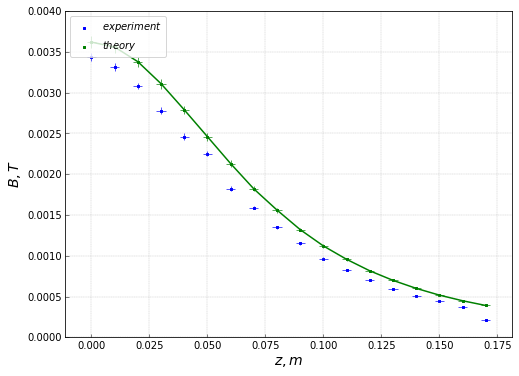

In [73]:
import matplotlib.pyplot as plt
fit = Plotter(draw_legend=True).set_name("304_4").set_title("").set_y_name("$B, T$").set_x_name(
        "$z, m$"). \
        add_line(Plotter.get_new_line(y_value=tab4.B, x_value=tab4.z,
                                      draw_error=True, legend='$experiment$', fit=False, color='blue', marker="s")).\
        add_line(Plotter.get_new_line(y_value=tab4.B_t, x_value=tab4.z,
                                      draw_error=True, legend='$theory$', fit=False, color='green', marker="s")).\
        plot(show=False, save=False, ylim=(0.0, 0.004))

b_val = [b.get_value_error()[0] for b in tab4.B_t]
z_val = [z.get_value_error()[0] for z in tab4.z]
plt.plot(z_val, b_val, color='green')
plt.savefig("images/304_4.png", format='png', dpi=300)
plt.show()

интересный лаг в 0.5 см. Кажется я систематически намерил что-то не то :)

In [86]:
tab5 = pd.read_csv("tables/5.csv", sep='\t')

In [87]:
tab5

,z,U1,U2,U3
0,0.5,80.3,74.3,87.3
1,1.0,81.7,75.1,89.2
2,1.5,82.7,75.8,90.1
3,2.0,83.5,75.9,92.1
4,2.5,83.9,75.7,93.3
5,3.0,84.0,75.5,94.0
6,3.5,84.5,75.0,94.2
7,4.0,84.6,74.6,94.6
8,4.5,84.0,74.0,94.7
9,5.0,84.6,73.7,94.6


In [88]:
tab5.z = (tab5.z.apply(Value) + Value(values=[0.0], syst=0.2)) / 100.0
tab5["B1"] = tab5.U1 * k / 1000.0
tab5["B2"] = tab5.U2 * k / 1000.0
tab5["B3"] = tab5.U3 * k / 1000.0

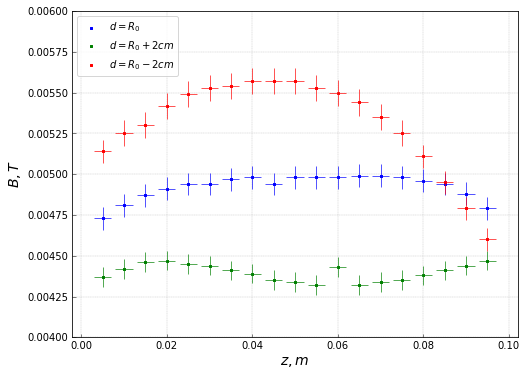

In [97]:
fit = Plotter(draw_legend=True).set_name("304_5").set_title("").set_y_name("$B, T$").set_x_name(
        "$z, m$"). \
        add_line(Plotter.get_new_line(y_value=tab5.B1, x_value=tab5.z,
                                      draw_error=True, legend='$d=R_0$', fit=False, color='blue', marker="s")).\
        add_line(Plotter.get_new_line(y_value=tab5.B2, x_value=tab5.z,
                                      draw_error=True, legend='$d=R_0 + 2cm$', fit=False, color='green', marker="s")).\
        add_line(Plotter.get_new_line(y_value=tab5.B3, x_value=tab5.z,
                                      draw_error=True, legend='$d=R_0 - 2cm$', fit=False, color='red', marker="s")).\
        plot(show=True, save=True, ylim=(0.004, 0.006))


In [92]:
R0 = 0.092
N = Value(values=[265], syst=5)
z_val = pd.Series([float(z.get_value_error()[0]) for z in tab5.z])

tab5["B_t_1"] = (z_val**2 + R0**2)**(-3/2) * 0.5 * mu0 * N * I * R0**2
tab5["B_t_2"] = ((R0 - z_val)**2 + R0**2)**(-3/2) * 0.5 * mu0 * N * I * R0**2
tab5["B_t"] = tab5.B_t_1 + tab5.B_t_2

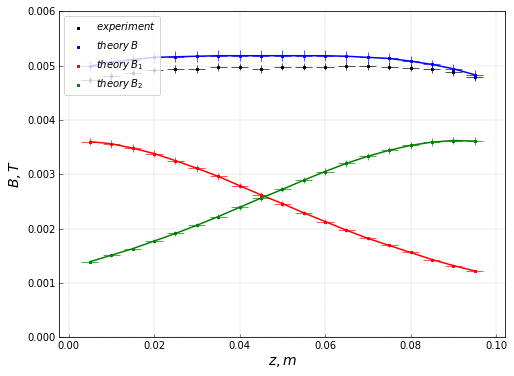

In [98]:
fit = Plotter(draw_legend=True).set_name("304_6").set_title("").set_y_name("$B, T$").set_x_name(
        "$z, m$"). \
        add_line(Plotter.get_new_line(y_value=tab5.B1, x_value=tab5.z,
                                      draw_error=True, legend='$experiment$', fit=False, color='black', marker="s")).\
        add_line(Plotter.get_new_line(y_value=tab5.B_t, x_value=tab5.z,
                                      draw_error=True, legend='$theory\:B$', fit=False, color='blue', marker="s")).\
        add_line(Plotter.get_new_line(y_value=tab5.B_t_1, x_value=tab5.z,
                                      draw_error=True, legend='$theory\:B_1$', fit=False, color='red', marker="s")).\
        add_line(Plotter.get_new_line(y_value=tab5.B_t_2, x_value=tab5.z,
                                      draw_error=True, legend='$theory\:B_2$', fit=False, color='green', marker="s")).\
        plot(show=False, save=False, ylim=(0.000, 0.006))

b_val = [b.get_value_error()[0] for b in tab5.B_t]
b1_val = [b.get_value_error()[0] for b in tab5.B_t_1]
b2_val = [b.get_value_error()[0] for b in tab5.B_t_2]

z_val = [z.get_value_error()[0] for z in tab5.z]
plt.plot(z_val, b_val, color='blue')
plt.plot(z_val, b1_val, color='red')
plt.plot(z_val, b2_val, color='green')
plt.savefig("images/304_6.png", format='png', dpi=300)
plt.show()

In [99]:
tab6 = pd.read_csv("tables/6.csv", sep='\t')

In [100]:
tab6

,z,U
0,0.0,84.6
1,0.5,84.3
2,1.0,84.2
3,1.5,84.0
4,2.0,83.7
5,2.5,83.2
6,3.0,82.7
7,3.5,81.8
8,4.0,86.0
9,4.5,78.6


In [101]:
tab6.z = (tab6.z.apply(Value) + Value(values=[0.0], syst=0.2)) / 100.0
tab6["B"] = tab6.U * k / 1000.0

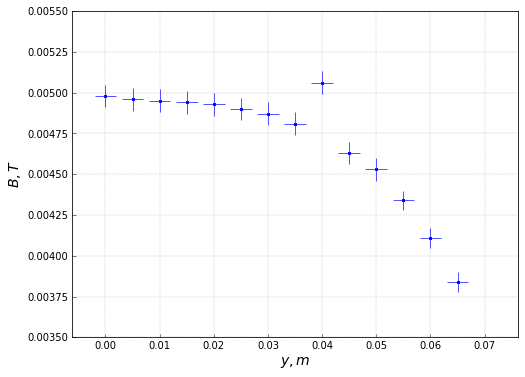

In [103]:
fit = Plotter(draw_legend=False).set_name("304_7").set_title("").set_y_name("$B, T$").set_x_name(
        "$y, m$"). \
        add_line(Plotter.get_new_line(y_value=tab6.B, x_value=tab6.z,
                                      draw_error=True, legend='$d=R_0$', fit=False, color='blue', marker="s")).\
        plot(show=True, save=True, ylim=(0.0035, 0.0055))
